# Explore C-SNOW composite maps

1/5/2022. Emilio Mayorga

Explore the C-SNOW composite maps generated by `CSNOW_inspect.py`

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import requests
from shapely.geometry import box
import geopandas as gpd
import xarray as xr

In [2]:
dirpth = Path("./experimental_sentinel1_snow_depth_data")
ncfile = "CSNOW_Experimental_CONUS_2019May_10Dmedian_latlon.nc"

ncpth = dirpth / ncfile

In [3]:
ds = xr.open_dataset(ncpth)
ds

<xarray.Dataset>
Dimensions:      (longitude: 6002, latitude: 2502, time: 3)
Coordinates:
  * longitude    (longitude) float64 -125.0 -125.0 -125.0 ... -65.01 -65.0
  * latitude     (latitude) float64 50.01 50.0 49.99 49.98 ... 25.02 25.01 25.0
  * time         (time) datetime64[ns] 2019-05-01 2019-05-11 2019-05-21
Data variables:
    spatial_ref  int64 ...
    snd          (time, latitude, longitude) float32 ...
Attributes:
    grid_mapping:  spatial_ref

Map the entire CONUS domain, for the first time step

## Plot maps in Wyoming CSO snowmodel domain, for closer inspection

In [4]:
# Load CSO domain JSON
cso_snowmodel_domains_url = "https://raw.githubusercontent.com/snowmodel-tools/preprocess_python/master/CSO_domains.json"
domains_resp = requests.get(cso_snowmodel_domains_url)
domains = domains_resp.json()

# Use Wyoming domain
domain = 'WY'

# Domain bounding box and projection
bbox = domains[domain]['Bbox']
bbox_proj = domains[domain]['stn_proj']

In [5]:
bbox_latlon_gs = gpd.GeoSeries(
    box(bbox['lonmin'], bbox['latmin'], bbox['lonmax'], bbox['latmax']), 
    crs=bbox_proj
)

Plot with the WY domain bounding box

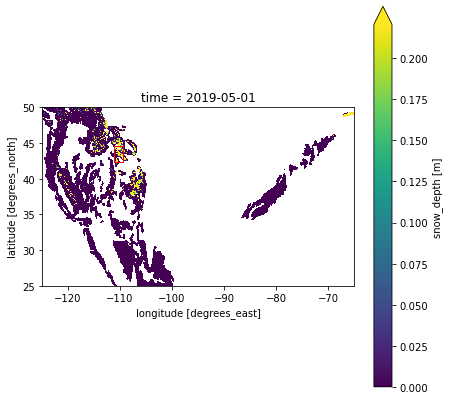

In [6]:
_, ax = plt.subplots(1, figsize=(7, 7))
ds.snd.isel(time=0).plot(ax=ax, robust=True);
bbox_latlon_gs.plot(ax=ax, edgecolor='red', facecolor='none');

Select on the WY domain and plot these zoomed maps

In [7]:
wy_ds = ds.sel(
    latitude=slice(bbox['latmax'], bbox['latmin']),
    longitude=slice(bbox['lonmin'], bbox['lonmax'])
).copy(deep=True)

In [8]:
wy_ds

<xarray.Dataset>
Dimensions:      (longitude: 168, latitude: 222, time: 3)
Coordinates:
  * longitude    (longitude) float64 -111.2 -111.1 -111.1 ... -109.5 -109.5
  * latitude     (latitude) float64 44.58 44.57 44.56 ... 42.39 42.38 42.37
  * time         (time) datetime64[ns] 2019-05-01 2019-05-11 2019-05-21
Data variables:
    spatial_ref  int64 0
    snd          (time, latitude, longitude) float32 ...
Attributes:
    grid_mapping:  spatial_ref

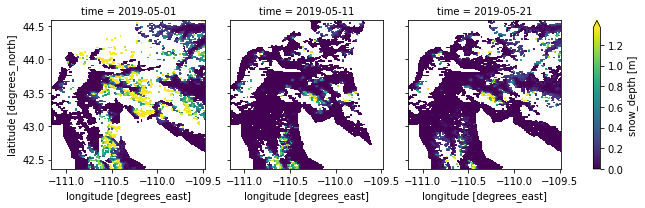

In [9]:
wy_ds.snd.plot(col='time', col_wrap=3, robust=True);

Filter out zeros in the map plots

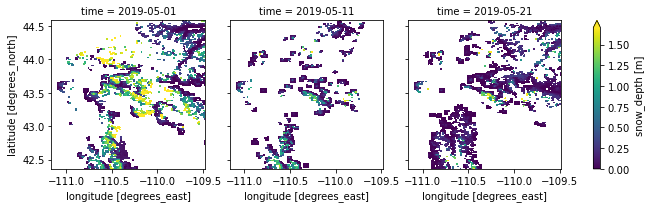

In [10]:
wy_ds.snd.where(wy_ds.snd > 0.001).plot(
    col='time', col_wrap=3, robust=True, vmin=0, extend='max');